In [79]:
import os
import gzip
from Bio import SeqIO
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Check and organise data

In [80]:
# list the paths in the directory
path = 'LR_shotgun_subsets/'
files = os.listdir(path)
extension = '.fastq.gz'
samples = [file[:-len(extension)] for file in files]

# store sample / record count in a dictionary
LR_subset_count = {}

# print the number of records in each file
for idx, files in enumerate(files):
    handle_in = gzip.open(path + files, "rt")
    total_records = sum(1 for _ in SeqIO.parse(handle_in, "fastq"))
    print(f'{samples[idx]}: {total_records}')
    LR_subset_count[samples[idx]] = total_records

# sort
sorted_LR_subset_dict = dict(sorted(LR_subset_count.items(), key=lambda item: item[1]))
LR_filenames_sorted = list(sorted_LR_subset_dict.keys())

LR_mockF_subset_1.5e4: 15000
LR_mockF_subset_500: 500
LR_mockF_subset_5e3: 5000
LR_mockF_subset_2e4: 20000
LR_mockF_subset_7.5e3: 7500
LR_mockF_subset_750: 750
LR_mockF_subset_2.5e3: 2500
LR_mockF_subset_100: 100
LR_mockF_subset_1e3: 1000
LR_mockF_subset_1e4: 10000


In [81]:
# # list the paths in the directory (slow)
# path = 'SR_shotgun_subsets/'
# files = os.listdir(path)
# extension = '.fastq.gz'
# samples = [file[:-len(extension)] for file in files]

# # store sample / record count in a dictionary
# SR_subset_count = {}

# # print the number of records in each file
# for idx, files in enumerate(files):
#     handle_in = gzip.open(path + files, "rt")
#     total_records = sum(1 for _ in SeqIO.parse(handle_in, "fastq"))
#     print(f'{samples[idx]}: {total_records}')
#     SR_subset_count[samples[idx]] = total_records

# # sort
# sorted_SR_subset_dict = dict(sorted(SR_subset_count.items(), key=lambda item: item[1]))
# SR_filenames_sorted = list(sorted_SR_subset_dict.keys())

### Read in data

In [82]:
### ground truth ###

input_mock = {"sample": ["Ground_truth", "Ground_truth", "Ground_truth", "Ground_truth", "Ground_truth", "Ground_truth", "Ground_truth"],
    "fraction": [0.1111111111, 0.2222222222, 0.1111111111, 0.1111111111, 0.2222222222, 0.1111111111, 0.1111111111],
    "genus": ["Corynebacterium", "Corynebacterium", "Staphylococcus", "Staphylococcus", "Pseudomonas", "Klebsiella", "Moraxella"],
    "species": ["Corynebacterium tuberculostearicum", "Corynebacterium pseudodiphtheriticum",
                "Staphylococcus aureus", "Staphylococcus epidermidis", "Pseudomonas aeruginosa",
                "Klebsiella pneumoniae", "Moraxella catarrhalis"]
}

input_mock = pd.DataFrame(input_mock)

In [83]:
LR_filenames_sorted

['LR_mockF_subset_100',
 'LR_mockF_subset_500',
 'LR_mockF_subset_750',
 'LR_mockF_subset_1e3',
 'LR_mockF_subset_2.5e3',
 'LR_mockF_subset_5e3',
 'LR_mockF_subset_7.5e3',
 'LR_mockF_subset_1e4',
 'LR_mockF_subset_1.5e4',
 'LR_mockF_subset_2e4']

In [84]:
### LR shotgun subsets ### (10 files)

# get data
pathLR_shot = "sourmash_output"
file_names = LR_filenames_sorted
LRdf_list = []

for file_name in file_names:
    full_path = os.path.join(pathLR_shot, file_name+'.profile.csv.krona.tsv')
    
    if os.path.exists(full_path):
        with open(full_path, 'r') as file:
            df = pd.read_csv(StringIO(file.read()), sep="\t", header=0)
            LRdf_list.append(df)

#  clean data and normalise unclassified reads
classified_LRdf_list = []
LRdf_list_copy = LRdf_list.copy()
subsets = ["100", "500", "750", "1e3", "2.5e3", "5e3", "7.5e3", "1e4", "1.5e4", "2e4", "NA"]

for i, df in enumerate(LRdf_list_copy):
    sum_classified = df.loc[df['genus'] != 'unclassified', 'fraction'].sum()
    df['fraction'] = df['fraction'] / sum_classified
    classified_df = df[df['genus'] != 'unclassified']
    classified_df.insert(0, 'sample', f"{subsets[i]}_LRshot")
    classified_LRdf_list.append(classified_df)

classified_LRshotgun = pd.concat(classified_LRdf_list, ignore_index=True)

In [85]:
### SR shotgun subsets ### (10 files)

# get data
pathSR_shot = "sourmash_output"
# file_names = SR_filenames_sorted
file_names = ['SR_mockF_subset_1e3',
 'SR_mockF_subset_1e4',
 'SR_mockF_subset_5e4',
 'SR_mockF_subset_1e5',
 'SR_mockF_subset_5e5',
 'SR_mockF_subset_1e6',
 'SR_mockF_subset_5e6',
 'SR_mockF_subset_1e7',
 'SR_mockF_subset_2e7',
 'SR_mockF_subset_full_3.9e7']
SRdf_list = []

for file_name in file_names:
    full_path = os.path.join(pathSR_shot, file_name+'.profile.csv.krona.tsv')
    
    if os.path.exists(full_path):
        with open(full_path, 'r') as file:
            df = pd.read_csv(StringIO(file.read()), sep="\t", header=0)
            SRdf_list.append(df)

#  clean data and normalise unclassified reads
classified_SRdf_list = []
SRdf_list_copy = SRdf_list.copy()
subsets = ["1e4", "5e4", "1e5", "5e5", "1e6", "5e6", "1e7", "2e7", "3.9e7"]

for i, df in enumerate(SRdf_list_copy):
    sum_classified = df.loc[df['genus'] != 'unclassified', 'fraction'].sum()
    df['fraction'] = df['fraction'] / sum_classified
    classified_df = df[df['genus'] != 'unclassified']
    classified_df.insert(0, 'sample', f"{subsets[i]}_SRshot")
    classified_SRdf_list.append(classified_df)

classified_SRshotgun = pd.concat(classified_SRdf_list, ignore_index=True)

In [86]:
# merge all dataframes together
all_dfs = [input_mock, classified_LRshotgun, classified_SRshotgun]
all_dfs_merged = pd.concat(all_dfs, ignore_index=True)[['sample', 'fraction', 'genus', 'species']]

# clean data
all_dfs_merged['genus'] = all_dfs_merged['genus'].str.replace("g__", "").str.replace("_", " ")
all_dfs_merged['species'] = all_dfs_merged['species'].str.replace("s__", "").str.replace("_", " ")

### Assign Taxonomic Colour Map

In [87]:
# make colours dataframe

colours = {
    "grey": ["#3A3A3A", "#565656", "#6A6A6A", "#949494", "#B5B5B5", "#DCDCDC"], # Acinetobacter n=1
    "indigo": ["#3240A1", "#3747AC", "#5260B9", "#6D7AC4", "#959ED5", "#BDC3E6"], # Bacillus A n=4
    # "blue": ["#165AB8", "#186BCC", "#1C7DE1", "#1F8BF1", "#3A9BF3", "#58ACF6", "#85C3F8", "#B3DAFA"], # Clostridium n=1
    "cyan": ["#047CCC", "#0790E1", "#079FF2", "#25ADF5", "#46BBF6", "#76CFF9"], # Corynebacteriaceae n=1
    # "teal": ["#007884", "#008C9D", "#00A2BA", "#00B4CF", "#22BFD6", "#44CADD", "#74D9E7", "#A9E8F0"], # Corynebacterium n=7
    "green": ["#80BC41", "#91C559", "#A4CF76", "#BDDD9B", "#D8EAC2", "#4A8029"], # Enterobacter n=1
    # "darkgreen": ["#29722C", "#318335", "#3B963E", "#43A646", "#5BB35F", "#76C079", "#9BD09E", "#C1E3C2"], # Enterobacteriaceae n=1
    "yellow": ["#FCB828", "#FDD32F", "#FFE934", "#FFED4D", "#FFEF6B", "#FEF392"],
    "orange": ["#F37004", "#FA8006", "#FF8D04", "#FF9D22", "#FFAE44", "#FFC575"],
    "magenta": ["#E71C57", "#EE5787", "#F284A8", "#F7B3CA", "#A3144C", "#BA1751"]
    # "red": ["#BF2524", "#CD2929", "#E2322F", "#F33B2F", "#ED4946", "#E16768", "#ED8F8F", "#FFC6CD"], # Escherichia n=1
    # "violet": ["#5F1A8F", "#701D98", "#8221A0", "#9024A7", "#A13EB4", "#B15DC1", "#C788D4", "#DDB6E3"], # Escherichia-Shigella n=1
    # "indigo": ["#252F87", "#2B3794", "#3240A1", "#3747AC", "#5260B9", "#6D7AC4", "#959ED5", "#BDC3E6"], # Gammaproteobacteria n=1 # Klebsiella n=5
    # "bloodorange": ["#D33B19", "#E24118", "#F3471C", "#FF4D1F", "#FF653A", "#FF7F59", "#FFA186", "#FFC5B5"], # Laceyella n=1
    # "purple": ["#5B33AE", "#724CBB", "#896AC6", "#AA92D6", "#3C2396", "#47289E", "#532FA8", "#CBBCE6"], # Moraxella n=4
    # "brown": ["#452E29", "#533830", "#624339", "#6E4B3F", "#826358", "#977D73", "#B4A09A", "#D1C5C2"], # Mycobacterium n=1
    # "green": ["#5C9531", "#70AA3A", "#80BC41", "#91C559", "#A4CF76", "#BDDD9B", "#D8EAC2", "#4A8029"], # Pseudomonas n=3
    # "limegreen": ["#949221", "#A6AB26", "#B8C42D", "#C6D832", "#CEDE4D", "#D7E36A", "#E2EB91", "#EEF2BB"] # Pseudomonas E n=1
     # Spirillospora n=1
     # Staphylococcus n=7
}    

colours_df = pd.DataFrame(colours)

colourname_list = []
tint_list = []
for column_name in colours_df.columns:
    colourname_list.append(column_name)
    tint_list.append(colours_df[column_name].values)

In [88]:
# assign genus colours, add column to all_dfs_coloured

unique_genera = all_dfs_merged['genus'].unique()
unique_genera = sorted(unique_genera)

if len(tint_list) < len(unique_genera):
    raise ValueError("There are more unique genera than there are colours in the colour palette")

genus_colour_df = pd.DataFrame(columns=["genus", "colour name", "tints"])

for i in range(len(unique_genera)):
    genus_colour_df.loc[i] = [unique_genera[i], colourname_list[i], tint_list[i]]

genus_colour_df['genus_hex'] = genus_colour_df.apply(lambda x: x['tints'][0], axis=1)

all_profiles_coloured = all_dfs_merged.merge(genus_colour_df[['genus', 'genus_hex']], on='genus', how='left')

In [89]:
# assign species colours, add column to all_dfs_coloured

unique_species = all_dfs_merged['species'].unique()
unique_species = sorted(unique_species)

# work in df with unique species
unique_species_df = pd.DataFrame(columns=['genus', 'species'])
# Match the species to their genus
unique_species_df['species'] = unique_species
unique_species_df['genus'] = unique_species_df['species'].apply(lambda x: all_dfs_merged.loc[all_dfs_merged['species'] == x, 'genus'].values[0])
# Add colours by taxonomy
unique_species_df = unique_species_df.merge(genus_colour_df[['genus', 'colour name']], on='genus', how='left')
unique_species_df = unique_species_df.merge(genus_colour_df[['genus', 'genus_hex']], on='genus', how='left')
unique_species_df = unique_species_df.merge(genus_colour_df[['genus', 'tints']], on='genus', how='left')

# Initialize a new column for hex codes, initialize genus_matches as 0
unique_species_df['species_hex'] = ''
genus_matches = 0

# Iterate through each row
for i in range(len(unique_species_df)):
    tints_list = unique_species_df.iloc[i]['tints']
    value_to_add = tints_list[genus_matches]
    unique_species_df.at[i, 'species_hex'] = value_to_add

    # Check if it's not the last row to avoid an index out-of-range error
    if i < len(unique_species_df) - 1:
        current_genus = unique_species_df.iloc[i]['genus']
        next_genus = unique_species_df.iloc[i + 1]['genus']
        
        # Check if the genus of the current row matches the next row
        if current_genus == next_genus:
            # increment genus matches
            genus_matches += 1
        else:
            genus_matches = 0

# match the species_hex column to the merged df
all_profiles_coloured = all_profiles_coloured.merge(unique_species_df[['species', 'species_hex']], on='species', how='left')

### Transform data for stacked bar chart

In [90]:
# colour maps
species_colour_map = unique_species_df.set_index('species')['species_hex'].to_dict()
genus_colour_map = unique_species_df.set_index('genus')['genus_hex'].to_dict()

In [91]:
# get data

all_df_list = []
for sample in all_profiles_coloured['sample'].unique():
    sample_df = all_profiles_coloured[all_profiles_coloured['sample'] == sample]
    all_df_list.append(sample_df)

final_LR_df_list = [all_df_list[0], all_df_list[1], all_df_list[2], all_df_list[3], all_df_list[4], all_df_list[5], 
                    all_df_list[6], all_df_list[7], all_df_list[8], all_df_list[9], all_df_list[10]]

final_SR_df_list = [all_df_list[0], all_df_list[11], all_df_list[12], all_df_list[13], all_df_list[14], all_df_list[15], 
                    all_df_list[16], all_df_list[17], all_df_list[18], all_df_list[19]]


In [92]:
### PREPARE SPECIES LEVEL DATA ###

# Create a DataFrame with the unique species as the index
sppDFplot = pd.DataFrame(index=unique_species)

# name the index column "species"
sppDFplot.index.name = "species"

# iterate through each df in final_df_list, name a column after the unique value in sample, and add the fraction to the sppDFplot DataFrame for the corresponding secies in the species column
for df in final_LR_df_list:
    sample = df['sample'].unique()[0]
    sppDFplot[sample] = df.set_index('species')['fraction']

# replace NaN with 0
sppDFplot.fillna(0, inplace=True)

# transpose
transposed_spp_data_LR = sppDFplot.T

In [93]:
### PREPARE SPECIES LEVEL DATA ###

# Create a DataFrame with the unique species as the index
sppDFplot = pd.DataFrame(index=unique_species)

# name the index column "species"
sppDFplot.index.name = "species"

# iterate through each df in final_df_list, name a column after the unique value in sample, and add the fraction to the sppDFplot DataFrame for the corresponding secies in the species column
for df in final_SR_df_list:
    sample = df['sample'].unique()[0]
    sppDFplot[sample] = df.set_index('species')['fraction']

# replace NaN with 0
sppDFplot.fillna(0, inplace=True)

# transpose
transposed_spp_data_SR = sppDFplot.T

In [151]:
### FUNCTION TO PLOT SPECIES ###

def plot_stackedbar_spp(df, labels, color_map,
                        background_colour, plot_colour, font_colour, line_colour):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(10, 10))
    
    # plot bars
    bottom = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.bar(df.index, df[name], bottom=bottom, color=color_map[name], alpha=0.85, edgecolor='#FEF995', width=1, label=name)
        bottom = bottom + df[name]
    
    # legend
    plt.text(10.75, 0.99, 'Species', fontsize=14, fontweight='bold', color=font_colour)
    legend = plt.legend(labels, bbox_to_anchor=([1.01, 0.99, 0, 0]), ncol=1, frameon=False)
    for text in legend.get_texts():
        text.set_color(font_colour)
        text.set_fontsize(11)
    
    # format y ticks
    yticks = np.arange(0, 1.1, 0.1)
    ylabels = ['{}%'.format(i) for i in np.arange(0, 101, 10)]
    plt.yticks(yticks, ylabels)

    # relabel x ticks
    plt.xticks(df.index, ["Truth", "100", "500", "750", "1e3", "2.5e3", "5e3", "7.5e3", "1e4", "1.5e4", "2e4"])

    # # adjust limits and draw grid lines
    plt.xlim(-0.5, ax.get_xticks()[-1] + 0.5)

    # axes label colour and font
    ax.tick_params(axis='x', colors=line_colour)
    ax.tick_params(axis='y', colors=line_colour)

    for label in ax.get_xticklabels():
        label.set_fontsize(16)
        label.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontsize(16)

    # Rotate x-axis tick labels
    plt.xticks(rotation=0)

    # Grid params
    ax.set_facecolor(plot_colour)

    # Figure params
    figure = plt.gcf()
    figure.set_facecolor(background_colour)
    
    # # horrizontal lines
    plt.axhline(y=0.221, color='#3240A1', linestyle='--', linewidth=2)
    plt.axhline(y=0.332, color='#5260B9', linestyle='--', linewidth=2)
    plt.axhline(y=0.444, color='#186BCC', linestyle='--', linewidth=2)
    plt.axhline(y=0.555, color='#80BC41', linestyle='--', linewidth=2)
    plt.axhline(y=0.777, color='#FCB828', linestyle='--', linewidth=2)
    plt.axhline(y=0.888, color='#E71C57', linestyle='--', linewidth=2)
    # vertical lines
    plt.axvline(x=0.5, color=plot_colour, linestyle='-', linewidth=3)
    ax.spines['right'].set_color(line_colour)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_color(line_colour)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_color(line_colour)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color(line_colour)
    ax.spines['bottom'].set_linewidth(2)

    # title and labels
    plt.text(1, 1.085, 'Read Depth and Taxonomic Profile', fontsize=22, fontweight='bold', color=font_colour)
    plt.text(1.9, 1.03, 'Long Read Sequencing Data', fontsize=22, color=font_colour)
    figure.supxlabel('Number of Reads in Data Set', color=font_colour, fontsize=18, y=0.045)
    ax.set_ylabel('Relative Abundance', color=font_colour, fontsize=16, fontweight='bold', labelpad=5)

    plt.show()

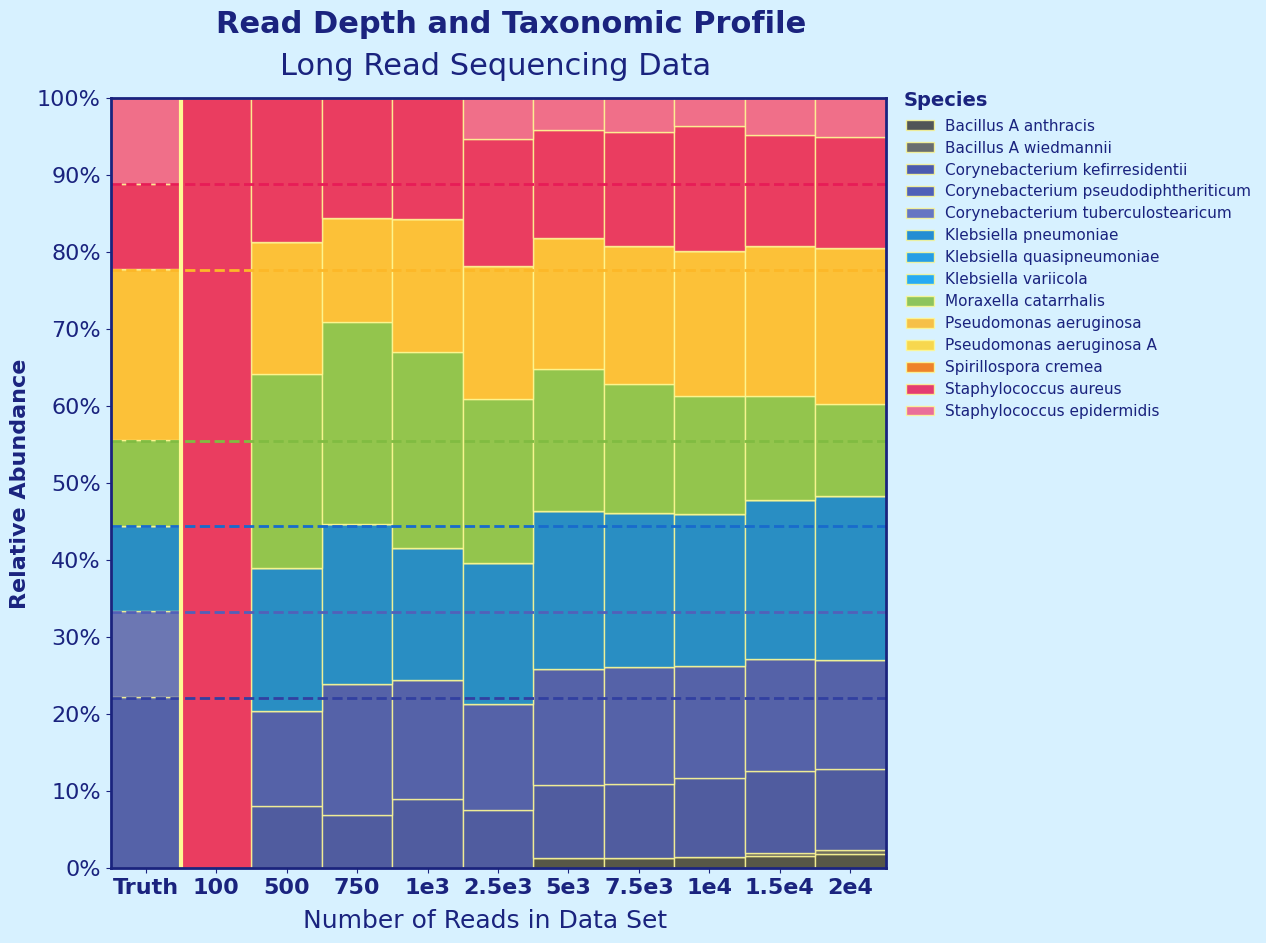

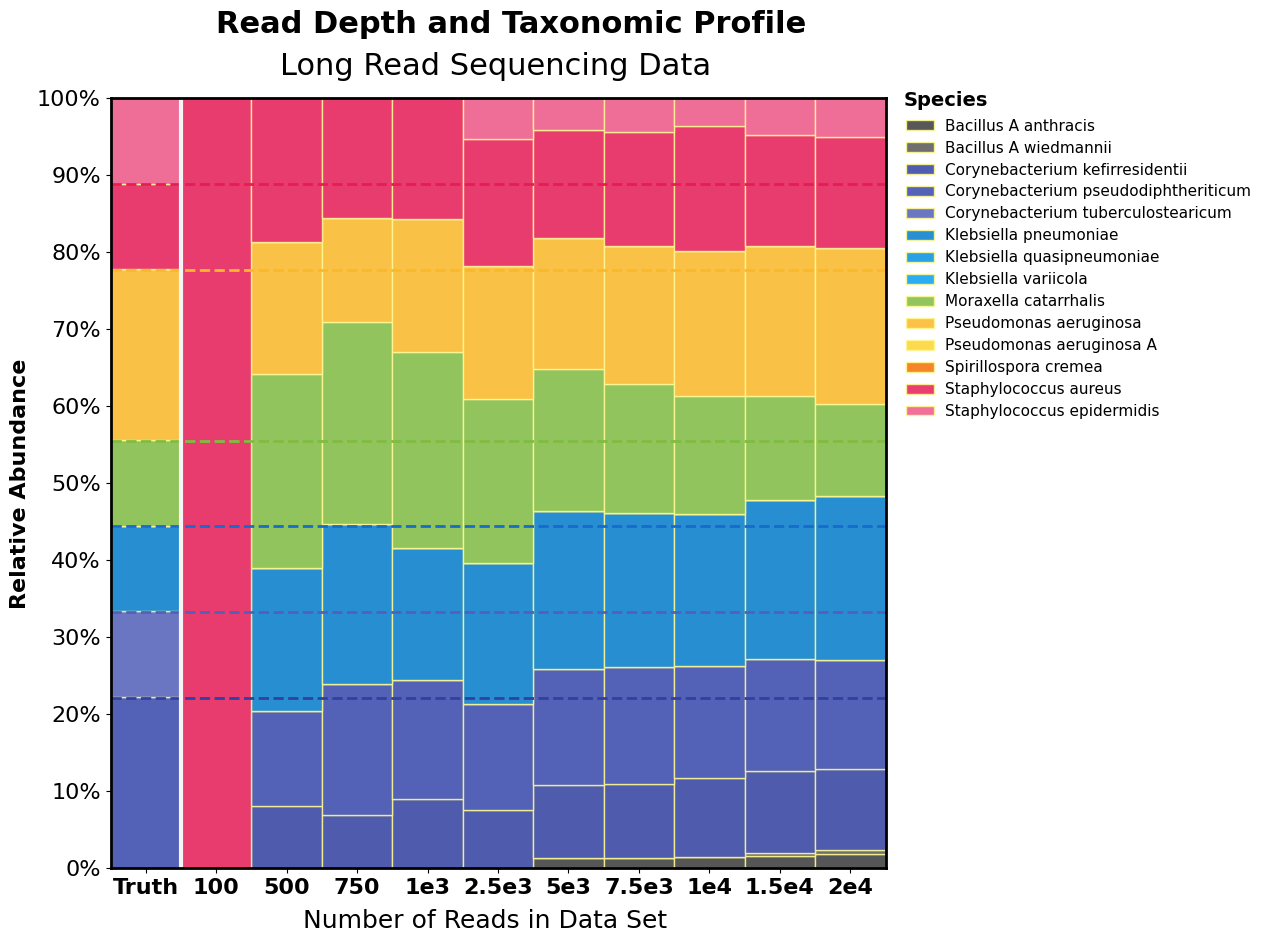

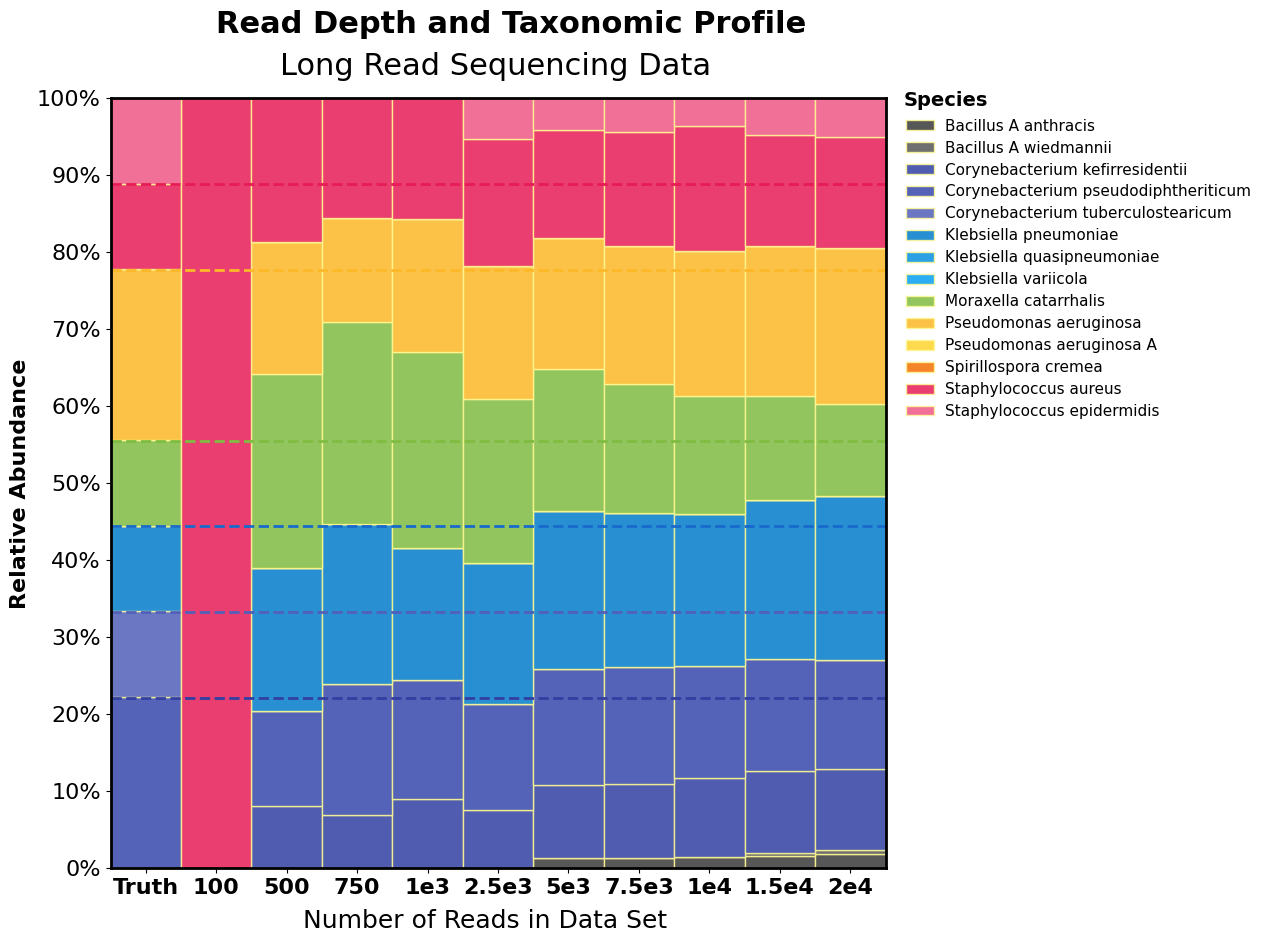

In [152]:
### PLOT LR ###

labels = sorted(all_profiles_coloured['species'].unique()) #labels for legend

# colours 1
background_colour = '#D7F1FF'
plot_colour = '#FEF995'
font_colour = '#1A237E'
line_colour = '#1A237E'
plot_stackedbar_spp(transposed_spp_data_LR, labels, species_colour_map,
                    background_colour, plot_colour, font_colour, line_colour)

# colours 2
background_colour = 'none'
plot_colour = 'whitesmoke'
font_colour = 'black'
line_colour = 'black'
plot_stackedbar_spp(transposed_spp_data_LR, labels, species_colour_map,
                    background_colour, plot_colour, font_colour, line_colour)

# colours 3
background_colour = 'none'
plot_colour = 'none'
font_colour = 'black'
line_colour = 'black'
plot_stackedbar_spp(transposed_spp_data_LR, labels, species_colour_map,
                    background_colour, plot_colour, font_colour, line_colour)

In [157]:
### FUNCTION TO PLOT SPECIES ###

def plot_stackedbar_spp(df, labels, color_map,
                        background_colour, plot_colour, font_colour, line_colour):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(10.5, 10))
    
    # plot bars
    bottom = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.bar(df.index, df[name], bottom=bottom, color=color_map[name], alpha=0.85, edgecolor='#FEF995', width=1, label=name)
        bottom = bottom + df[name]
    
    # legend
    plt.text(9.8, 0.99, 'Species', fontsize=14, fontweight='bold', color=font_colour)
    legend = plt.legend(labels, bbox_to_anchor=([1.01, 0.99, 0, 0]), ncol=1, frameon=False)
    for text in legend.get_texts():
        text.set_color(font_colour)
        text.set_fontsize(11)
    
    # format y ticks
    yticks = np.arange(0, 1.1, 0.1)
    ylabels = ['{}%'.format(i) for i in np.arange(0, 101, 10)]
    plt.yticks(yticks, ylabels)

    # relabel x ticks
    plt.xticks(df.index, ["Truth", "1e4", "5e4", "1e5", "5e5", "1e6", "5e6", "1e7", "2e7", "3.9e7"])

    # # adjust limits and draw grid lines
    plt.xlim(-0.5, ax.get_xticks()[-1] + 0.5)

    # axes label colour and font
    ax.tick_params(axis='x', colors=line_colour)
    ax.tick_params(axis='y', colors=line_colour)

    for label in ax.get_xticklabels():
        label.set_fontsize(16)
        label.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontsize(16)

    # Rotate x-axis tick labels
    plt.xticks(rotation=0)

    # Grid params
    ax.set_facecolor(plot_colour)

    # Figure params
    figure = plt.gcf()
    figure.set_facecolor(background_colour)
    
    # # horrizontal lines
    plt.axhline(y=0.221, color='#3240A1', linestyle='--', linewidth=2)
    plt.axhline(y=0.332, color='#5260B9', linestyle='--', linewidth=2)
    plt.axhline(y=0.444, color='#186BCC', linestyle='--', linewidth=2)
    plt.axhline(y=0.555, color='#80BC41', linestyle='--', linewidth=2)
    plt.axhline(y=0.777, color='#FCB828', linestyle='--', linewidth=2)
    plt.axhline(y=0.888, color='#E71C57', linestyle='--', linewidth=2)
    # vertical lines
    plt.axvline(x=0.5, color=plot_colour, linestyle='-', linewidth=3)
    ax.spines['right'].set_color(line_colour)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_color(line_colour)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_color(line_colour)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_color(line_colour)
    ax.spines['bottom'].set_linewidth(2)

    # title and labels
    plt.text(1, 1.085, 'Read Depth and Taxonomic Profile', fontsize=22, fontweight='bold', color=font_colour)
    plt.text(1.9, 1.03, 'Short Read Sequencing Data', fontsize=22, color=font_colour)
    figure.supxlabel('Number of Reads in Data Set', color=font_colour, fontsize=18, y=0.045)
    ax.set_ylabel('Relative Abundance', color=font_colour, fontsize=16, fontweight='bold', labelpad=5)

    plt.show()

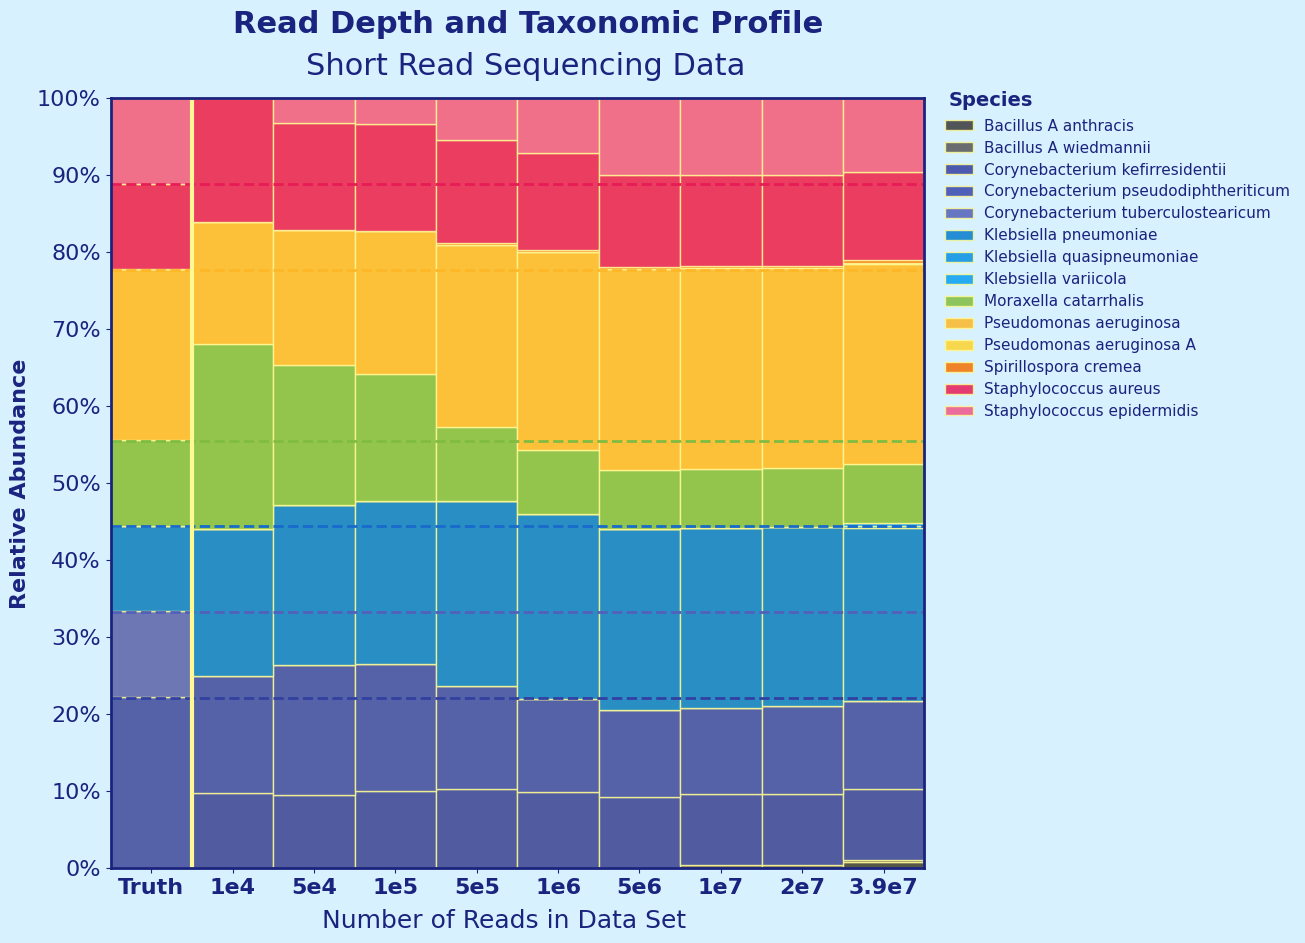

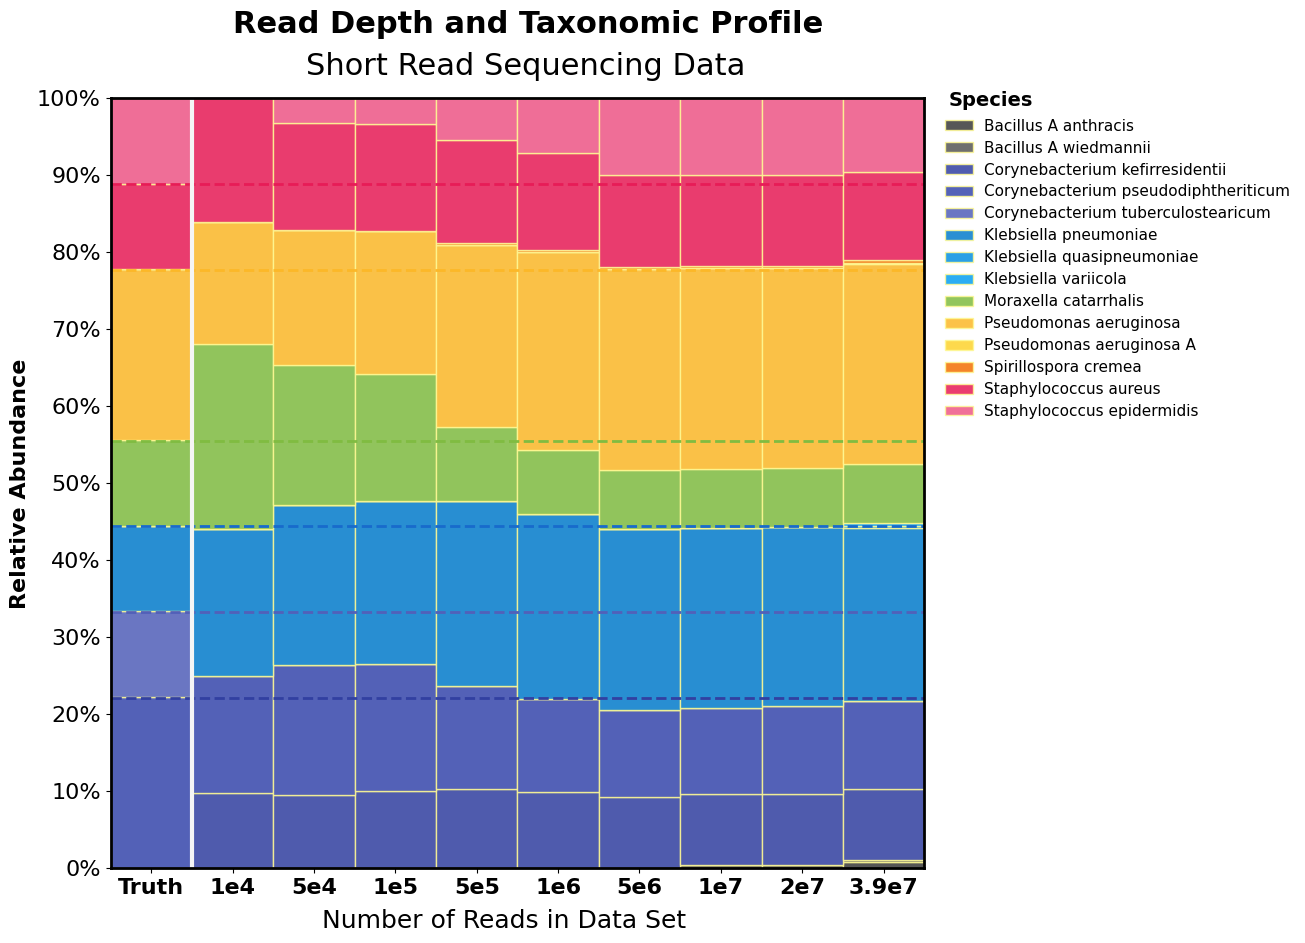

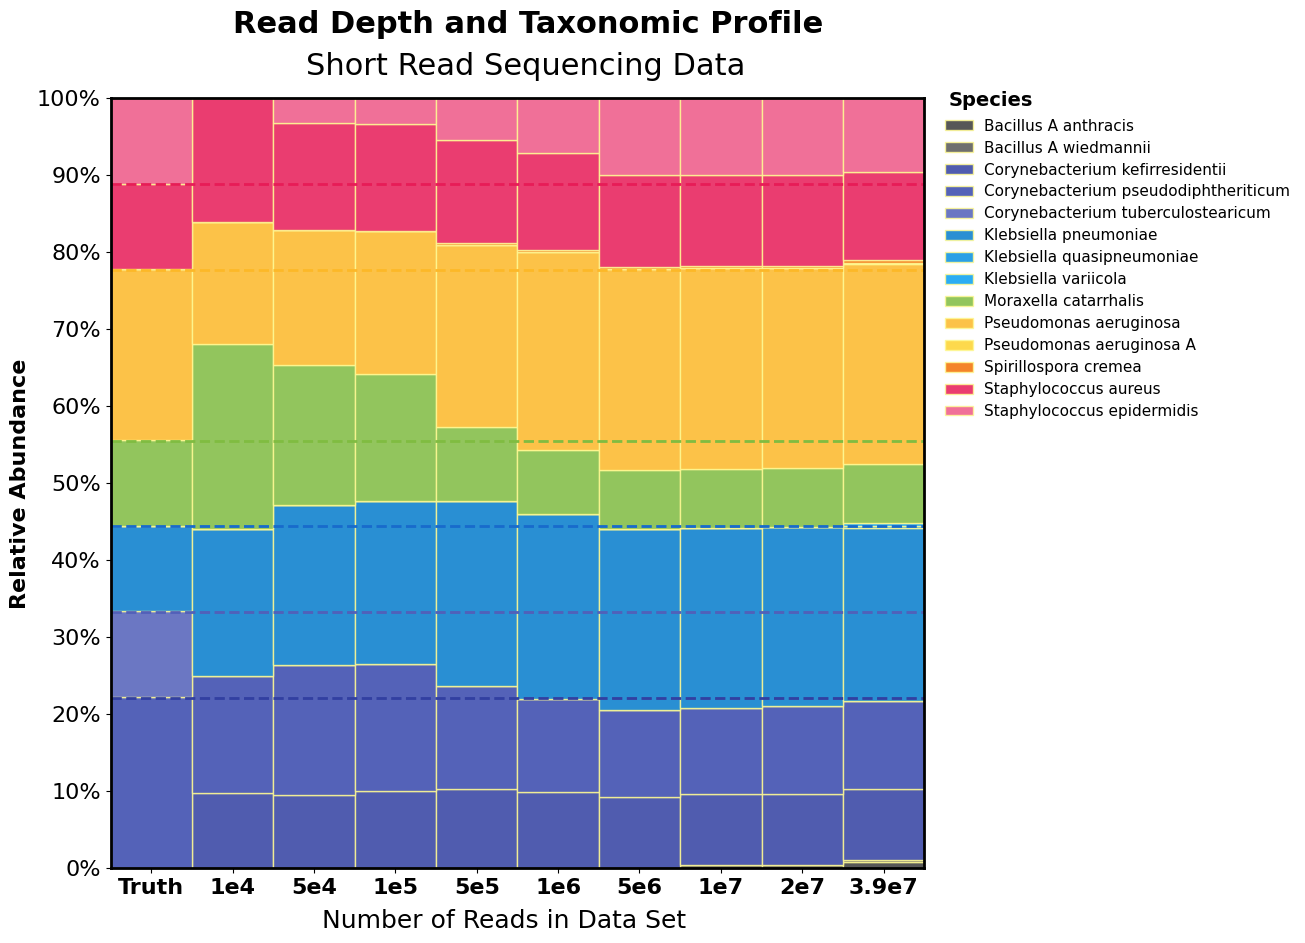

In [158]:
### PLOT SR ###

labels = sorted(all_profiles_coloured['species'].unique()) #labels for legend

# colours 1
background_colour = '#D7F1FF'
plot_colour = '#FEF995'
font_colour = '#1A237E'
line_colour = '#1A237E'
plot_stackedbar_spp(transposed_spp_data_SR, labels, species_colour_map,
                    background_colour, plot_colour, font_colour, line_colour)

# colours 2
background_colour = 'none'
plot_colour = 'whitesmoke'
font_colour = 'black'
line_colour = 'black'
plot_stackedbar_spp(transposed_spp_data_SR, labels, species_colour_map,
                    background_colour, plot_colour, font_colour, line_colour)

# colours 3
background_colour = 'none'
plot_colour = 'none'
font_colour = 'black'
line_colour = 'black'
plot_stackedbar_spp(transposed_spp_data_SR, labels, species_colour_map,
                    background_colour, plot_colour, font_colour, line_colour)